In [418]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import scipy
import requests

plt.style.use('classic')
%matplotlib inline
sns.set()

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [318]:
#Import Data from csv
audience_df = pd.read_csv('aud_metrics.csv')

In [319]:
#Describe metadata
meta = audience_df.info(verbose=True)
print(meta)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143585 entries, 0 to 143584
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   YEAR          143585 non-null  int64 
 1   REALM_NAME    143585 non-null  object
 2   COUNTRY_CODE  142875 non-null  object
 3   DAY_ID        143585 non-null  object
 4   AVG_DAU_DD    143585 non-null  int64 
 5   AVG_BTL_CNT   143585 non-null  int64 
 6   AVG_REGS_CNT  143585 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.7+ MB
None


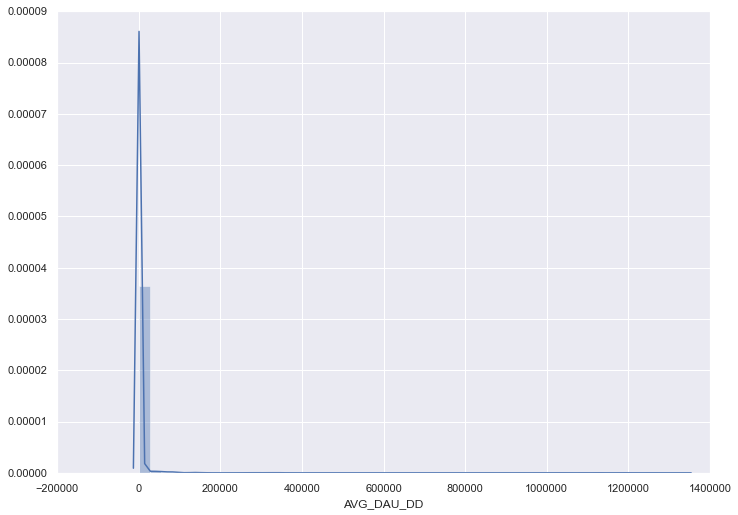

In [320]:
#CHeck distributiom of DAU
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(audience_df['AVG_DAU_DD'])
plt.show()

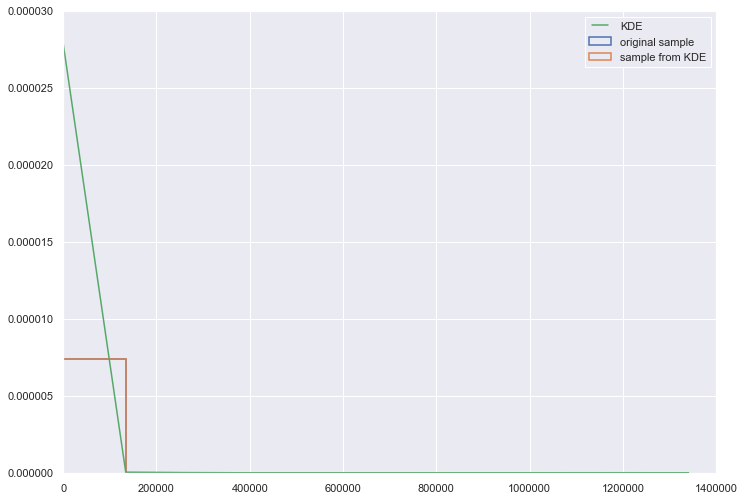

In [321]:
#Resample data from 2019, 2020 

num_19 = len(audience_df['AVG_DAU_DD'].loc[(audience_df['YEAR'] == 2019)])
num_20 = len(audience_df['AVG_DAU_DD'].loc[(audience_df['YEAR'] == 2020)])

# Generate a KDE from the empirical sample
dau_pdf_19 = scipy.stats.gaussian_kde(audience_df['AVG_DAU_DD'].loc[(audience_df['YEAR'] == 2019)], bw_method=0.3)
dau_pdf_20 = scipy.stats.gaussian_kde(audience_df['AVG_DAU_DD'].loc[(audience_df['YEAR'] == 2020)], bw_method=0.3)

# Sample new datapoints from the KDE
sample_dau_19 = dau_pdf_19.resample(num_19).T[:,0]
sample_dau_20 = dau_pdf_20.resample(num_20).T[:,0]

# Histogram of initial empirical sample (2019)
cnts, bins, p = plt.hist(audience_df['AVG_DAU_DD'].loc[(audience_df['YEAR'] == 2019)], label='original sample', bins=10,
                         histtype='step', linewidth=1.5, density=True)

# Histogram of datapoints sampled from KDE (2019)
plt.hist(sample_dau_19, label='sample from KDE', bins=bins,
         histtype='step', linewidth=1.5, density=True)

# Visualize the kde itself (2019)
y_kde = dau_pdf_19(bins)
plt.plot(bins, y_kde, label='KDE')
plt.legend()
plt.show(block=False)





In [368]:
#Make a copy of a dataframe that will contain 'fake' dau
dau_df = audience_df.copy()

In [369]:
#Drop columns
dau_df = dau_df.drop(columns = ['AVG_BTL_CNT', 'AVG_REGS_CNT']) 
dau_df

,YEAR,REALM_NAME,COUNTRY_CODE,DAY_ID,AVG_DAU_DD
0,2020,China,IN,22.01.20 00:00:00,1
1,2020,China,PK,22.01.20 00:00:00,1
2,2020,China,US,22.01.20 00:00:00,21
3,2020,China,N/D,22.01.20 00:00:00,44439
4,2020,North China,NG,23.01.20 00:00:00,1
...,...,...,...,...,...
143580,2019,North China,NL,07.05.19 00:00:00,2
143581,2019,South-East Asia,GU,06.05.19 00:00:00,1
143582,2019,South-East Asia,CY,06.05.19 00:00:00,1
143583,2019,South-East Asia,HK,06.05.19 00:00:00,791


In [353]:
# from sklearn.utils import shuffle
# dau_df['AVG_DAU_DD'] = shuffle(dau_df['AVG_DAU_DD'].loc[(dau_df['YEAR'] == 2019)], random_state = 0)
# dau_df['AVG_DAU_DD'].loc[(dau_df['YEAR'] == 2020)] = shuffle(dau_df['AVG_DAU_DD'].loc[(dau_df['YEAR'] == 2020)], random_state = 0)

In [372]:
#Resample data
dau_df['AVG_DAU_DD'] = dau_df['AVG_DAU_DD'].sample(frac=1).reset_index(drop=True)

In [374]:
#Save to csv
dau_df.to_csv("sampled_dau.csv", index = False)

In [417]:
#Get population data
url = 'https://data.opendatasoft.com/api/records/1.0/search/?dataset=world-population%40kapsarc&facet=year&facet=country_name&refine.year=2018'
response=requests.get(url).json()
response

{'nhits': 262,
 'parameters': {'dataset': ['world-population@kapsarc'],
  'timezone': 'UTC',
  'rows': 10,
  'format': 'json',
  'facet': ['year', 'country_name']},
 'records': [{'datasetid': 'world-population@kapsarc',
   'recordid': '1132ea6171335b8bb36c80483447fdecd5496ce9',
   'fields': {'country_name': 'American Samoa',
    'value': 55465.0,
    'year': '2018'},
   'record_timestamp': '1970-01-01T00:00:00+00:00'},
  {'datasetid': 'world-population@kapsarc',
   'recordid': 'f5604cc1ff61bbd090d35d97eb18d697bf47128d',
   'fields': {'country_name': 'Andorra', 'value': 77006.0, 'year': '2018'},
   'record_timestamp': '1970-01-01T00:00:00+00:00'},
  {'datasetid': 'world-population@kapsarc',
   'recordid': '08d4b506f2efc359e2c1103266a2c28777390d95',
   'fields': {'country_name': 'Austria', 'value': 8847037.0, 'year': '2018'},
   'record_timestamp': '1970-01-01T00:00:00+00:00'},
  {'datasetid': 'world-population@kapsarc',
   'recordid': 'ea7bfa4c136b224a14cc74c0eff2daf15ae646cb',
   'fiel